In [1]:
import pandas as pd
import numpy as np
import missingno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [2]:
train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')
gen_sub = pd.read_csv('gender_submission.csv')
train_set = pd.DataFrame(train_set)
train_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Columns description
### - Survived: Yes = 1, No = 0
### - Pclass: 1st class = 1, 2nd class = 2, 3rd class = 3
### - SibSp = Amount of siblings/spouse on the boat
### - Parch = Amount of parents/children
### - Ticket = Ticket Number
### - Fare = Passenger fare
### - Cabin = Cabin number
### - Embarked = Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

In [3]:
train_set[['Pclass', 'Survived']].groupby(['Pclass'],
                                          as_index = False).mean().sort_values(by = 'Survived',ascending = False)


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [4]:
train_set[['Sex','Survived']].groupby(['Sex'],as_index = False).mean().sort_values(by = 'Survived',ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [5]:
train_set[['SibSp','Survived']].groupby(['SibSp'],as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [6]:
train_set[['Parch', 'Survived']].groupby(['Parch'],as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


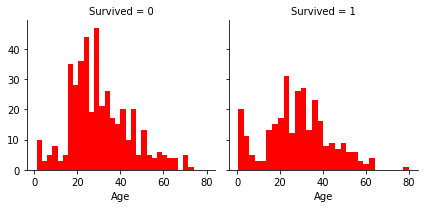

In [7]:
grid = sns.FacetGrid(train_set, col = 'Survived')
grid.map(plt.hist, 'Age', bins = 30, color = 'r')

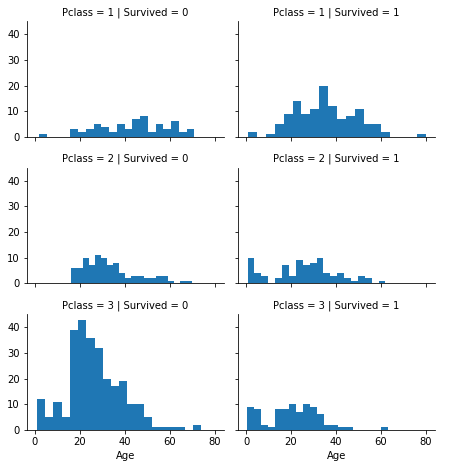

In [8]:
grid = sns.FacetGrid(train_set, col = 'Survived', row = 'Pclass', height = 2.2, aspect = 1.4)
grid.map(plt.hist, 'Age', alpha = 1, bins = 20)
grid.add_legend()

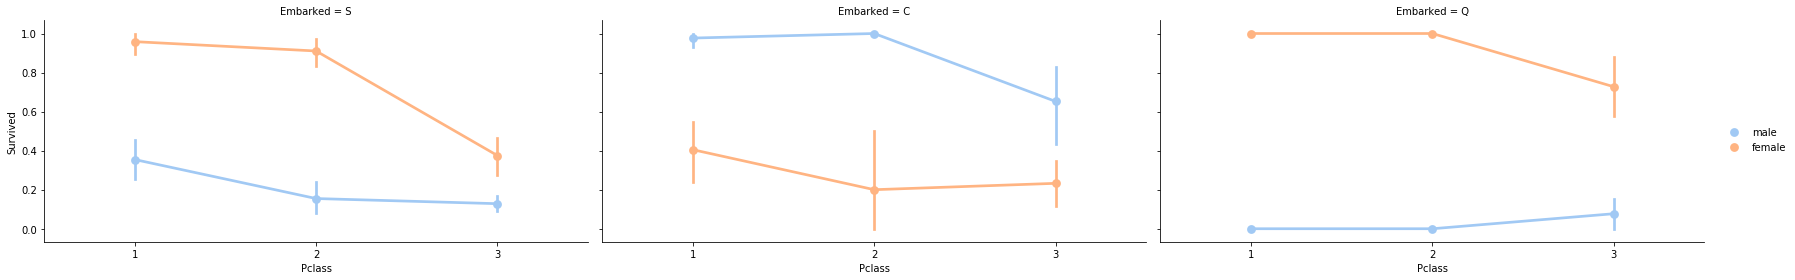

In [9]:

grid = sns.FacetGrid(train_set, col = 'Embarked', height = 4, aspect = 2)
grid.map(sns.pointplot, 'Pclass', 'Survived','Sex', palette = 'pastel', join = True,
         order = None, hue_order = None)
grid.add_legend()
plt.show()

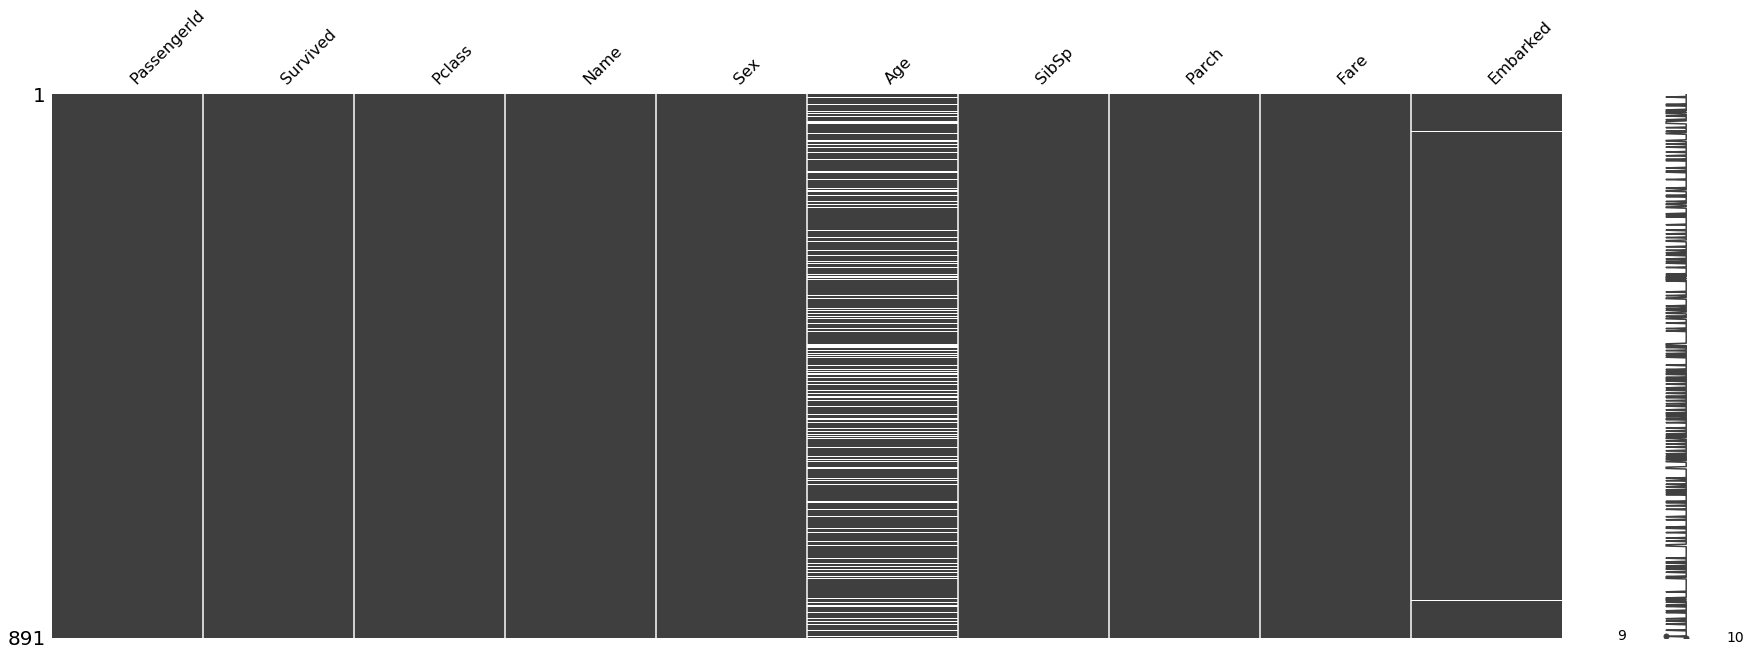

In [10]:
train_set = train_set.drop(['Cabin', 'Ticket'], axis = 1)
test_set = test_set.drop(['Cabin', 'Ticket'], axis = 1)
missingno.matrix(train_set, figsize = (30,10))

plt.show()

In [11]:
combine = [train_set, test_set]

In [12]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(train_set['Title'], train_set['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [13]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_set[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [14]:
title_mapping = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rare': 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [15]:
test_set

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,3
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,3
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,S,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C,5
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S,1
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,S,1


In [16]:
train_set = train_set.drop(['Name','PassengerId'], axis = 1)
test_set = test_set.drop(['Name','PassengerId'], axis = 1)
combine = [train_set, test_set]


In [17]:
train_set.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,3
2,1,3,female,26.0,0,0,7.9250,S,2
3,1,1,female,35.0,1,0,53.1000,S,3
4,0,3,male,35.0,0,0,8.0500,S,1
5,0,3,male,NaN,0,0,8.4583,Q,1
6,0,1,male,54.0,0,0,51.8625,S,1
7,0,3,male,2.0,3,1,21.0750,S,4
8,1,3,female,27.0,0,2,11.1333,S,3
9,1,2,female,14.0,1,0,30.0708,C,3


In [18]:
le = LabelEncoder()
train_set.loc[:,'Sex'] = le.fit_transform(train_set.loc[:,'Sex'])
test_set.loc[:,'Sex'] = le.transform(test_set.loc[:,'Sex'])

In [19]:
train_set.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,S,1
1,1,1,0,38.0,1,0,71.2833,C,3
2,1,3,0,26.0,0,0,7.9250,S,2
3,1,1,0,35.0,1,0,53.1000,S,3
4,0,3,1,35.0,0,0,8.0500,S,1
5,0,3,1,NaN,0,0,8.4583,Q,1
6,0,1,1,54.0,0,0,51.8625,S,1
7,0,3,1,2.0,3,1,21.0750,S,4
8,1,3,0,27.0,0,2,11.1333,S,3
9,1,2,0,14.0,1,0,30.0708,C,3


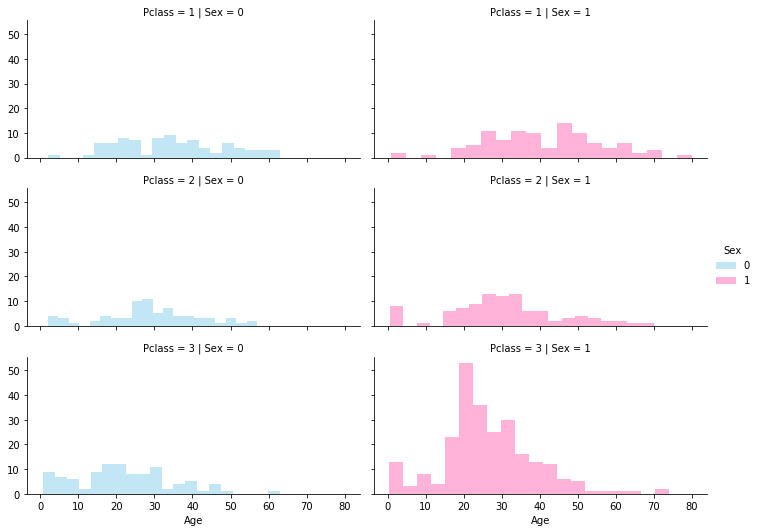

In [20]:
pal = {0:"skyblue", 1:"hotpink"}
grid = sns.FacetGrid(train_set, row = 'Pclass', 
                     col = 'Sex', height = 2.5, aspect = 2,
                     hue = 'Sex', palette = pal)
grid.map(plt.hist,'Age', alpha = 0.5, bins = 20)
grid.add_legend()
plt.show()

In [21]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [22]:
train_and_test = pd.DataFrame(pd.concat([train_set, test_set], ignore_index = False, keys = ['Train','Test']))
train_and_test

Survived  Pclass  Sex   Age  SibSp  Parch      Fare Embarked  Title
Train 0         0.0       3    1  22.0      1      0    7.2500        S      1
      1         1.0       1    0  38.0      1      0   71.2833        C      3
      2         1.0       3    0  26.0      0      0    7.9250        S      2
      3         1.0       1    0  35.0      1      0   53.1000        S      3
      4         0.0       3    1  35.0      0      0    8.0500        S      1
...             ...     ...  ...   ...    ...    ...       ...      ...    ...
Test  413       NaN       3    1   NaN      0      0    8.0500        S      1
      414       NaN       1    0  39.0      0      0  108.9000        C      5
      415       NaN       3    1  38.5      0      0    7.2500        S      1
      416       NaN       3    1   NaN      0      0    8.0500        S      1
      417       NaN       3    1   NaN      1      1   22.3583        C      4

[1309 rows x 9 columns]

In [23]:
sex_class_array = np.zeros((2,3))    
for i in range(0,2):
    for j in range(0,3):
        guesses = train_and_test.loc[(train_and_test['Sex'] == i)&(train_and_test['Pclass'] == j+1)]['Age'].dropna()
        age_mean = guesses.mean()
        age_std = guesses.std()
        age_guess = np.random.uniform(age_mean - age_std, age_mean + age_std)

        sex_class_array[i,j] = int(age_guess*2)/2

for i in range(0, 2):
        for j in range(0, 3):
            train_and_test.loc[ (train_and_test['Age'].isnull()) & (train_and_test['Sex'] == i) & (train_and_test['Pclass'] == j+1),\
                    'Age'] = sex_class_array[i,j]

    
    
    
    
    
    
    

In [24]:
#print(train_and_test.loc[(train_and_test['Sex'] == 1)&(train_and_test['Pclass'] == 3)]['Age'].dropna())
#print(guess_age)
#print(age_mean)
#print(age_std)
#print(age_guess)
print(sex_class_array)
train_and_test.isna()

[[45.5 37.  11.5]
 [40.  43.  25. ]]


Survived  Pclass    Sex    Age  SibSp  Parch   Fare  Embarked  \
Train 0       False   False  False  False  False  False  False     False   
      1       False   False  False  False  False  False  False     False   
      2       False   False  False  False  False  False  False     False   
      3       False   False  False  False  False  False  False     False   
      4       False   False  False  False  False  False  False     False   
...             ...     ...    ...    ...    ...    ...    ...       ...   
Test  413      True   False  False  False  False  False  False     False   
      414      True   False  False  False  False  False  False     False   
      415      True   False  False  False  False  False  False     False   
      416      True   False  False  False  False  False  False     False   
      417      True   False  False  False  False  False  False     False   

           Title  
Train 0    False  
      1    False  
      2    False  
      3    False  
      4    False  
...          ...  
Test  413  False  
      414  False  
      415  False  
      416  False  
      417  False  

[1309 rows x 9 columns]

In [25]:
#for i in range(0, 2):
        #for j in range(0, 3):
            #train_and_test.loc[ (train_and_test.Age.isnull()) & (train_and_test.Sex == i) & (train_and_test.Pclass == j+1),\
                    #'Age'] = sex_class_array[i,j]

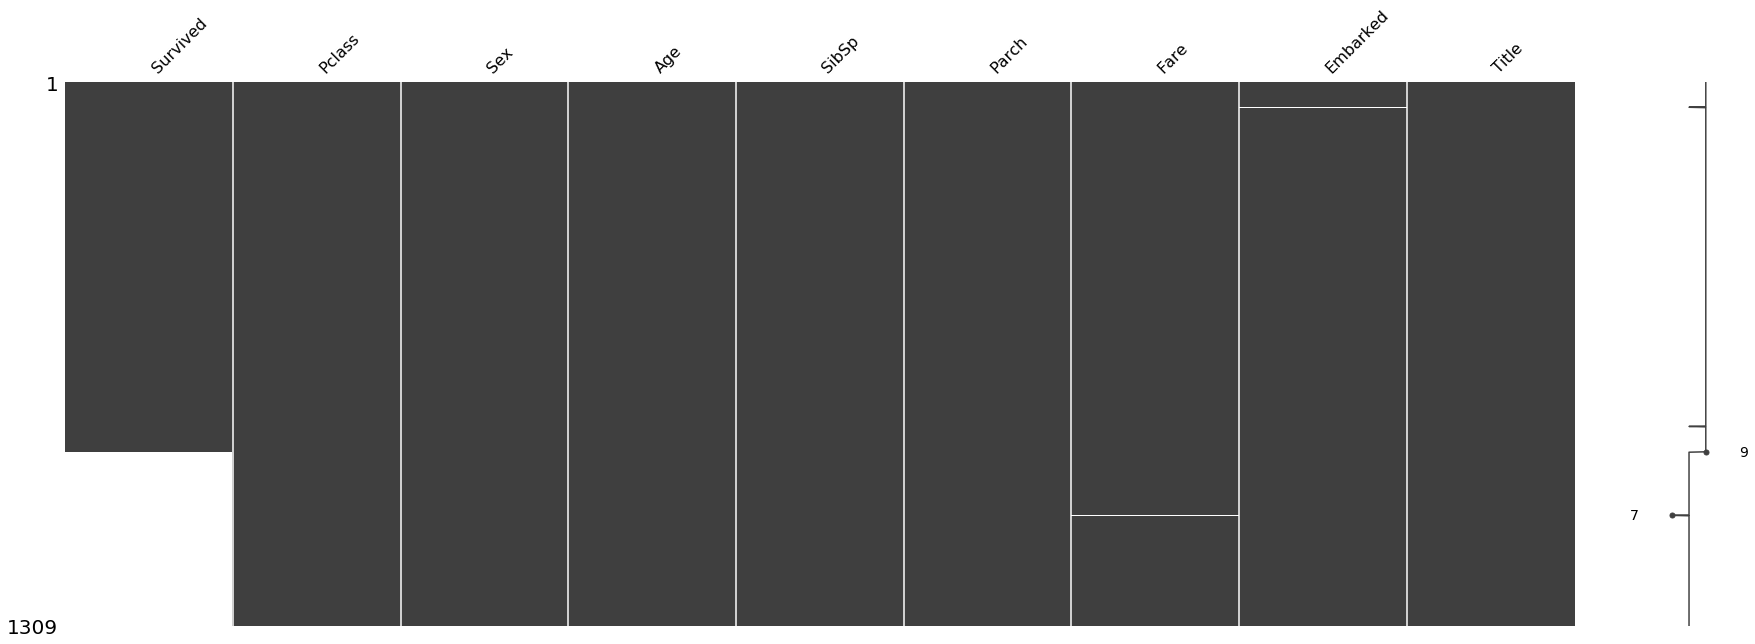

Survived  Pclass  Sex   Age  SibSp  Parch     Fare Embarked  Title
Train 0       0.0       3    1  22.0      1      0   7.2500        S      1
      1       1.0       1    0  38.0      1      0  71.2833        C      3
      2       1.0       3    0  26.0      0      0   7.9250        S      2
      3       1.0       1    0  35.0      1      0  53.1000        S      3
      4       0.0       3    1  35.0      0      0   8.0500        S      1
      5       0.0       3    1  25.0      0      0   8.4583        Q      1
      6       0.0       1    1  54.0      0      0  51.8625        S      1
      7       0.0       3    1   2.0      3      1  21.0750        S      4
      8       1.0       3    0  27.0      0      2  11.1333        S      3
      9       1.0       2    0  14.0      1      0  30.0708        C      3

In [26]:
missingno.matrix(train_and_test, figsize = (30,10))
plt.show()

train_and_test.head(10)

In [27]:
train_and_test['Family'] = 1 + train_and_test['SibSp']\
+ train_and_test['Parch']
train_and_test.head(10)

Survived  Pclass  Sex   Age  SibSp  Parch     Fare Embarked  Title  \
Train 0       0.0       3    1  22.0      1      0   7.2500        S      1   
      1       1.0       1    0  38.0      1      0  71.2833        C      3   
      2       1.0       3    0  26.0      0      0   7.9250        S      2   
      3       1.0       1    0  35.0      1      0  53.1000        S      3   
      4       0.0       3    1  35.0      0      0   8.0500        S      1   
      5       0.0       3    1  25.0      0      0   8.4583        Q      1   
      6       0.0       1    1  54.0      0      0  51.8625        S      1   
      7       0.0       3    1   2.0      3      1  21.0750        S      4   
      8       1.0       3    0  27.0      0      2  11.1333        S      3   
      9       1.0       2    0  14.0      1      0  30.0708        C      3   

         Family  
Train 0       2  
      1       2  
      2       1  
      3       2  
      4       1  
      5       1  
      6       1  
      7       5  
      8       3  
      9       2

In [28]:
train_and_test[['Family', 'Survived']].groupby(['Family'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)
# Consider changing this to Alone where the column shows if they were
# alone or not





,Family,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [29]:
train_and_test['Age_Range'] = pd.cut(train_and_test['Age'], 5)
print(train_and_test[['Age_Range', 'Survived']].groupby(['Age_Range']\
                                                  , as_index = False)\
.mean().sort_values(by = 'Age_Range', ascending = True))

train_and_test['Fare'].fillna(train_and_test['Fare'].dropna().median(), inplace = True)
train_and_test['Fare_Range'] = pd.qcut(train_and_test['Fare'], 5)
print(train_and_test[['Fare_Range', 'Survived']].groupby(['Fare_Range']\
                                                  , as_index = False)\
.mean().sort_values(by = 'Fare_Range', ascending = True))

          Age_Range  Survived
0  (0.0902, 16.136]  0.563380
1  (16.136, 32.102]  0.311364
2  (32.102, 48.068]  0.410480
3  (48.068, 64.034]  0.434783
4    (64.034, 80.0]  0.090909
          Fare_Range  Survived
0    (-0.001, 7.854]  0.217877
1      (7.854, 10.5]  0.201087
2     (10.5, 21.558]  0.426901
3   (21.558, 41.579]  0.443243
4  (41.579, 512.329]  0.645349


In [30]:
le = LabelEncoder()
train_and_test.loc[:,'Fare'] = le.fit_transform(train_and_test.loc[:,'Fare_Range'])
train_and_test.loc[:,'Age'] = le.fit_transform(train_and_test.loc[:,'Age_Range'])
train_and_test = train_and_test.drop(['Age_Range', 'SibSp', 'Parch','Fare_Range'], axis = 1)


In [31]:
train_and_test.head()

Survived  Pclass  Sex  Age  Fare Embarked  Title  Family
Train 0       0.0       3    1    1     0        S      1       2
      1       1.0       1    0    2     4        C      3       2
      2       1.0       3    0    1     1        S      2       1
      3       1.0       1    0    2     4        S      3       2
      4       0.0       3    1    2     1        S      1       1

In [32]:
train_and_test['Embarked'] = \
train_and_test['Embarked'].fillna(train_and_test['Embarked'].dropna()\
                                .mode()[0])
train_and_test.loc[:,'Embarked'] = le.fit_transform(train_and_test.loc[:,'Embarked'])


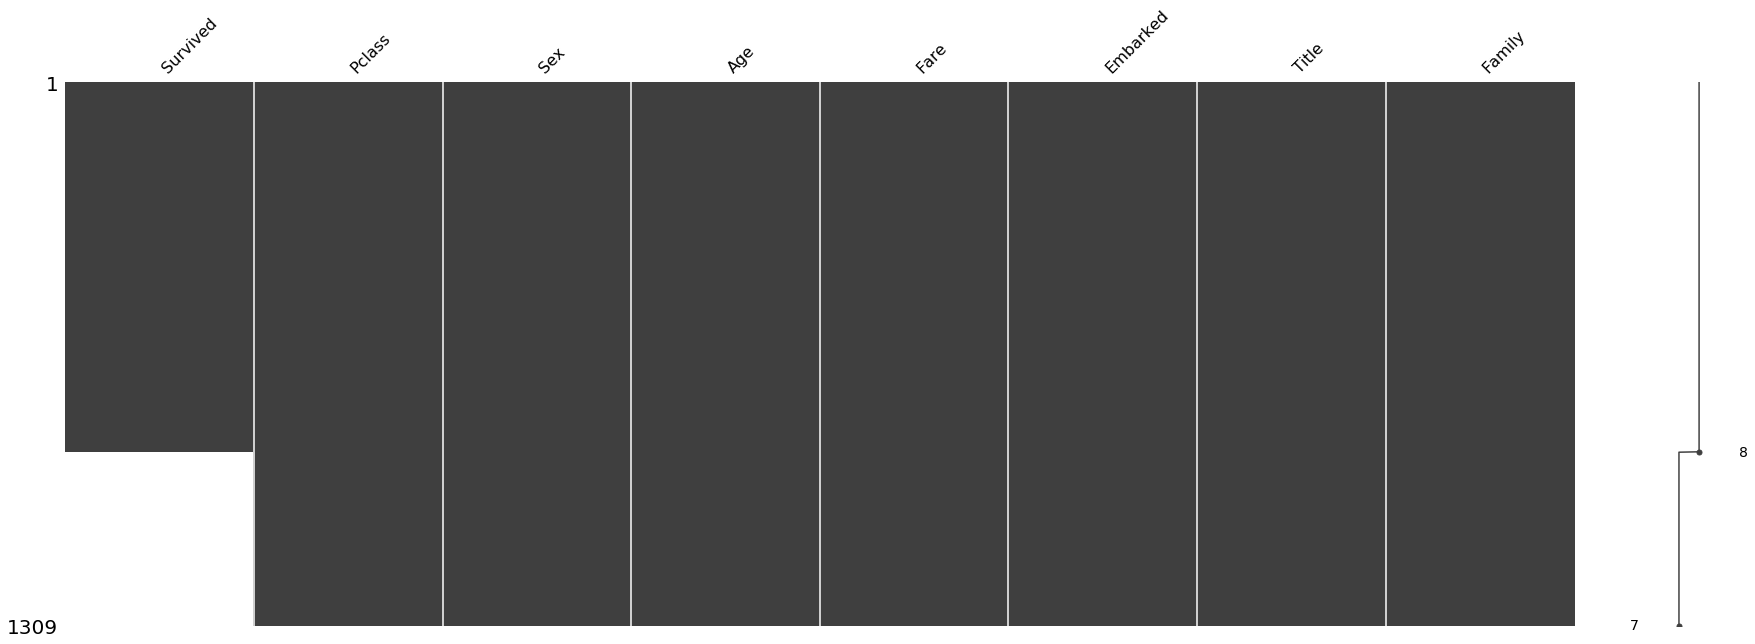

Survived  Pclass  Sex  Age  Fare  Embarked  Title  Family
Train 0       0.0       3    1    1     0         2      1       2
      1       1.0       1    0    2     4         0      3       2
      2       1.0       3    0    1     1         2      2       1
      3       1.0       1    0    2     4         2      3       2
      4       0.0       3    1    2     1         2      1       1
      5       0.0       3    1    1     1         1      1       1
      6       0.0       1    1    3     4         2      1       1
      7       0.0       3    1    0     2         2      4       5
      8       1.0       3    0    1     2         2      3       3
      9       1.0       2    0    0     3         0      3       2

In [33]:
missingno.matrix(train_and_test, figsize = (30,10))
plt.show()
train_and_test.head(10)

In [34]:
train_set = train_and_test.iloc[0:891,:]

In [35]:
train_set

Survived  Pclass  Sex  Age  Fare  Embarked  Title  Family
Train 0         0.0       3    1    1     0         2      1       2
      1         1.0       1    0    2     4         0      3       2
      2         1.0       3    0    1     1         2      2       1
      3         1.0       1    0    2     4         2      3       2
      4         0.0       3    1    2     1         2      1       1
...             ...     ...  ...  ...   ...       ...    ...     ...
      886       0.0       2    1    1     2         2      5       1
      887       1.0       1    0    1     3         2      2       1
      888       0.0       3    0    0     3         2      2       4
      889       1.0       1    1    1     3         0      1       1
      890       0.0       3    1    1     0         1      1       1

[891 rows x 8 columns]

In [36]:
test_set = train_and_test.iloc[891:,:]
test_set

Survived  Pclass  Sex  Age  Fare  Embarked  Title  Family
Test 0         NaN       3    1    2     0         1      1       1
     1         NaN       3    0    2     0         2      3       2
     2         NaN       2    1    3     1         1      1       1
     3         NaN       3    1    1     1         2      1       1
     4         NaN       3    0    1     2         2      3       3
...            ...     ...  ...  ...   ...       ...    ...     ...
     413       NaN       3    1    1     1         2      1       1
     414       NaN       1    0    2     4         0      5       1
     415       NaN       3    1    2     0         2      1       1
     416       NaN       3    1    1     1         2      1       1
     417       NaN       3    1    1     3         0      4       3

[418 rows x 8 columns]

# Things to consider for more possible data preprocessing
### - Possibly change the family column into an 'Alone' column. 1 = 1(Alone), 0 = 2+(Not alone)
### - Possibly multiply some column features together (age * class) to see if they could help out with a score

## More module imports

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score

In [38]:
display_side_by_side(train_set, test_set)

Survived 
 Pclass 
 Sex 
 Age 
 Fare 
 Embarked 
 Title 
 Family 
 
 
 
 
 Train 
 0 
 0.0 
 3 
 1 
 1 
 0 
 2 
 1 
 2 
 
 
 1 
 1.0 
 1 
 0 
 2 
 4 
 0 
 3 
 2 
 
 
 2 
 1.0 
 3 
 0 
 1 
 1 
 2 
 2 
 1 
 
 
 3 
 1.0 
 1 
 0 
 2 
 4 
 2 
 3 
 2 
 
 
 4 
 0.0 
 3 
 1 
 2 
 1 
 2 
 1 
 1 
 
 
 5 
 0.0 
 3 
 1 
 1 
 1 
 1 
 1 
 1 
 
 
 6 
 0.0 
 1 
 1 
 3 
 4 
 2 
 1 
 1 
 
 
 7 
 0.0 
 3 
 1 
 0 
 2 
 2 
 4 
 5 
 
 
 8 
 1.0 
 3 
 0 
 1 
 2 
 2 
 3 
 3 
 
 
 9 
 1.0 
 2 
 0 
 0 
 3 
 0 
 3 
 2 
 
 
 10 
 1.0 
 3 
 0 
 0 
 2 
 2 
 2 
 3 
 
 
 11 
 1.0 
 1 
 0 
 3 
 3 
 2 
 2 
 1 
 
 
 12 
 0.0 
 3 
 1 
 1 
 1 
 2 
 1 
 1 
 
 
 13 
 0.0 
 3 
 1 
 2 
 3 
 2 
 1 
 7 
 
 
 14 
 0.0 
 3 
 0 
 0 
 0 
 2 
 2 
 1 
 
 
 15 
 1.0 
 2 
 0 
 3 
 2 
 2 
 3 
 1 
 
 
 16 
 0.0 
 3 
 1 
 0 
 3 
 1 
 4 
 6 
 
 
 17 
 1.0 
 2 
 1 
 2 
 2 
 2 
 1 
 1 
 
 
 18 
 0.0 
 3 
 0 
 1 
 2 
 2 
 3 
 2 
 
 
 19 
 1.0 
 3 
 0 
 0 
 0 
 0 
 3 
 1 
 
 
 20 
 0.0 
 2 
 1 
 2 
 3 
 2 
 1 
 1 
 
 
 21 
 1.0 
 2 
 1 
 2 
 2 
 2 
 1 
 1 
 
 
 22 
 1.0 
 3 
 0 
 0 
 1 
 1 
 2 
 1 
 
 
 23 
 1.0 
 1 
 1 
 1 
 3 
 2 
 1 
 1 
 
 
 24 
 0.0 
 3 
 0 
 0 
 2 
 2 
 2 
 5 
 
 
 25 
 1.0 
 3 
 0 
 2 
 3 
 2 
 3 
 7 
 
 
 26 
 0.0 
 3 
 1 
 1 
 0 
 0 
 1 
 1 
 
 
 27 
 0.0 
 1 
 1 
 1 
 4 
 2 
 1 
 6 
 
 
 28 
 1.0 
 3 
 0 
 0 
 1 
 1 
 2 
 1 
 
 
 29 
 0.0 
 3 
 1 
 1 
 1 
 2 
 1 
 1 
 
 
 30 
 0.0 
 1 
 1 
 2 
 3 
 0 
 5 
 1 
 
 
 31 
 1.0 
 1 
 0 
 2 
 4 
 0 
 3 
 2 
 
 
 32 
 1.0 
 3 
 0 
 0 
 0 
 1 
 2 
 1 
 
 
 33 
 0.0 
 2 
 1 
 4 
 1 
 2 
 1 
 1 
 
 
 34 
 0.0 
 1 
 1 
 1 
 4 
 0 
 1 
 2 
 
 
 35 
 0.0 
 1 
 1 
 2 
 4 
 2 
 1 
 2 
 
 
 36 
 1.0 
 3 
 1 
 1 
 0 
 0 
 1 
 1 
 
 
 37 
 0.0 
 3 
 1 
 1 
 1 
 2 
 1 
 1 
 
 
 38 
 0.0 
 3 
 0 
 1 
 2 
 2 
 2 
 3 
 
 
 39 
 1.0 
 3 
 0 
 0 
 2 
 0 
 2 
 2 
 
 
 40 
 0.0 
 3 
 0 
 2 
 1 
 2 
 3 
 2 
 
 
 41 
 0.0 
 2 
 0 
 1 
 2 
 2 
 3 
 2 
 
 
 42 
 0.0 
 3 
 1 
 1 
 1 
 0 
 1 
 1 
 
 
 43 
 1.0 
 2 
 0 
 0 
 3 
 0 
 2 
 4 
 
 
 44 
 1.0 
 3 
 0 
 1 
 1 
 1 
 2 
 1 
 
 
 45 
 0.0 
 3 
 1 
 1 
 1 
 2 
 1 
 1 
 
 
 46 
 0.0 
 3 
 1 
 1 
 2 
 1 
 1 
 2 
 
 
 47 
 1.0 
 3 
 0 
 0 
 0 
 1 
 2 
 1 
 
 
 48 
 0.0 
 3 
 1 
 1 
 3 
 0 
 1 
 3 
 
 
 49 
 0.0 
 3 
 0 
 1 
 2 
 2 
 3 
 2 
 
 
 50 
 0.0 
 3 
 1 
 0 
 3 
 2 
 4 
 6 
 
 
 51 
 0.0 
 3 
 1 
 1 
 0 
 2 
 1 
 1 
 
 
 52 
 1.0 
 1 
 0 
 3 
 4 
 0 
 3 
 2 
 
 
 53 
 1.0 
 2 
 0 
 1 
 3 
 2 
 3 
 2 
 
 
 54 
 0.0 
 1 
 1 
 4 
 4 
 0 
 1 
 2 
 
 
 55 
 1.0 
 1 
 1 
 2 
 3 
 2 
 1 
 1 
 
 
 56 
 1.0 
 2 
 0 
 1 
 1 
 2 
 2 
 1 
 
 
 57 
 0.0 
 3 
 1 
 1 
 0 
 0 
 1 
 1 
 
 
 58 
 1.0 
 2 
 0 
 0 
 3 
 2 
 2 
 4 
 
 
 59 
 0.0 
 3 
 1 
 0 
 4 
 2 
 4 
 8 
 
 
 60 
 0.0 
 3 
 1 
 1 
 0 
 0 
 1 
 1 
 
 
 61 
 1.0 
 1 
 0 
 2 
 4 
 2 
 2 
 1 
 
 
 62 
 0.0 
 1 
 1 
 2 
 4 
 2 
 1 
 2 
 
 
 63 
 0.0 
 3 
 1 
 0 
 3 
 2 
 4 
 6 
 
 
 64 
 0.0 
 1 
 1 
 2 
 3 
 0 
 1 
 1 
 
 
 65 
 1.0 
 3 
 1 
 1 
 2 
 0 
 4 
 3 
 
 
 66 
 1.0 
 2 
 0 
 1 
 1 
 2 
 3 
 1 
 
 
 67 
 0.0 
 3 
 1 
 1 
 1 
 2 
 1 
 1 
 
 
 68 
 1.0 
 3 
 0 
 1 
 1 
 2 
 2 
 7 
 
 
 69 
 0.0 
 3 
 1 
 1 
 1 
 2 
 1 
 3 
 
 
 70 
 0.0 
 2 
 1 
 1 
 1 
 2 
 1 
 1 
 
 
 71 
 0.0 
 3 
 0 
 0 
 4 
 2 
 2 
 8 
 
 
 72 
 0.0 
 2 
 1 
 1 
 4 
 2 
 1 
 1 
 
 
 73 
 0.0 
 3 
 1 
 1 
 2 
 0 
 1 
 2 
 
 
 74 
 1.0 
 3 
 1 
 1 
 4 
 2 
 1 
 1 
 
 
 75 
 0.0 
 3 
 1 
 1 
 0 
 2 
 1 
 1 
 
 
 76 
 0.0 
 3 
 1 
 1 
 1 
 2 
 1 
 1 
 
 
 77 
 0.0 
 3 
 1 
 1 
 1 
 2 
 1 
 1 
 
 
 78 
 1.0 
 2 
 1 
 0 
 3 
 2 
 4 
 3 
 
 
 79 
 1.0 
 3 
 0 
 1 
 2 
 2 
 2 
 1 
 
 
 80 
 0.0 
 3 
 1 
 1 
 1 
 2 
 1 
 1 
 
 
 81 
 1.0 
 3 
 1 
 1 
 1 
 2 
 1 
 1 
 
 
 82 
 1.0 
 3 
 0 
 0 
 0 
 1 
 2 
 1 
 
 
 83 
 0.0 
 1 
 1 
 1 
 4 
 2 
 1 
 1 
 
 
 84 
 1.0 
 2 
 0 
 1 
 1 
 2 
 2 
 1 
 
 
 85 
 1.0 
 3 
 0 
 2 
 2 
 2 
 3 
 4 
 
 
 86 
 0.0 
 3 
 1 
 0 
 3 
 2 
 1 
 5 
 
 
 87 
 0.0 
 3 
 1 
 1 
 1 
 2 
 1 
 1 
 
 
 88 
 1.0 
 1 
 0 
 1 
 4 
 2 
 2 
 6 
 
 
 89 
 0.0 
 3 
 1 
 1 
 1 
 2 
 1 
 1 
 
 
 90 
 0.0 
 3 
 1 
 1 
 1 
 2 
 1 
 1 
 
 
 91 
 0.0 
 3 


In [39]:
X_train = train_set.iloc[:,1:].values
X_test = test_set.iloc[:,1:].values
Y_train = train_set.iloc[:,0].values
Y_test = gen_sub.iloc[:,1].values

In [40]:
print(X_train)

[[3 1 1 ... 2 1 2]
 [1 0 2 ... 0 3 2]
 [3 0 1 ... 2 2 1]
 ...
 [3 0 0 ... 2 2 4]
 [1 1 1 ... 0 1 1]
 [3 1 1 ... 1 1 1]]


In [41]:
print(X_test)

[[3 1 2 ... 1 1 1]
 [3 0 2 ... 2 3 2]
 [2 1 3 ... 1 1 1]
 ...
 [3 1 2 ... 2 1 1]
 [3 1 1 ... 2 1 1]
 [3 1 1 ... 0 4 3]]


In [42]:
print(Y_train)

[0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1.
 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0.
 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1.
 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0.
 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1.
 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1.

In [43]:
print(Y_test)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


# Logistic Regression

In [63]:
LogRegressor = LogisticRegression()
LogRegressor.fit(X_train, Y_train)
Y_pred = LogRegressor.predict(X_test)
#print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))
print('Confusion matrix')
cm = confusion_matrix(Y_pred, Y_test)
print(cm)
print('\n')
print('Accuracy score(Testing Score):', + (round(accuracy_score(Y_pred, Y_test)*100)))
print('R-Squared:', + (round(r2_score(Y_pred, Y_test)*100)))
print('Logisitic Regression score(Training score):', +(round(LogRegressor.score(X_train,Y_train)*100)))

Confusion matrix
[[243  11]
 [ 23 141]]


Accuracy score(Testing Score): 92.0
R-Squared: 66.0
Logisitic Regression score(Training score): 81.0
